<a href="https://colab.research.google.com/github/siddhantjain07/Tensorflow-in-Practice/blob/master/3.TF-NLP/TF_NLP7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Using Convolutional layers

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow_datasets as tfds
import tensorflow as tf

In [2]:
#Using the IMDB dataset
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteJSC8A4/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteJSC8A4/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteJSC8A4/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
tokenizer = info.features['text'].encoder

In [4]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation=tf.nn.relu),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
num_epochs = 10
history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 25s 64ms/step - loss: 0.4477 - accuracy: 0.7798 - val_loss: 0.3034 - val_accuracy: 0.8790
Epoch 2/10
391/391 [==============================] - 16s 41ms/step - loss: 0.2190 - accuracy: 0.9180 - val_loss: 0.2945 - val_accuracy: 0.8797
Epoch 3/10
391/391 [==============================] - 15s 39ms/step - loss: 0.1669 - accuracy: 0.9398 - val_loss: 0.3091 - val_accuracy: 0.8729
Epoch 4/10
391/391 [==============================] - 15s 38ms/step - loss: 0.1352 - accuracy: 0.9530 - val_loss: 0.3765 - val_accuracy: 0.8673
Epoch 5/10
391/391 [==============================] - 15s 37ms/step - loss: 0.1082 - accuracy: 0.9634 - val_loss: 0.4005 - val_accuracy: 0.8630
Epoch 6/10
391/391 [==============================] - 15s 37ms/step - loss: 0.0866 - accuracy: 0.9722 - val_loss: 0.4886 - val_accuracy: 0.8602
Epoch 7/10
391/391 [==============================] - 14s 36ms/step - loss: 0.0722 - accuracy: 0.9757 - val_loss: 0.5253 - val_accuracy:

In [8]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

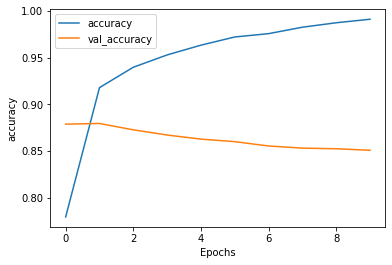

In [9]:
plot_graphs(history, 'accuracy')

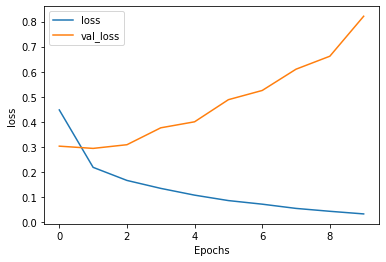

In [10]:
plot_graphs(history, 'loss')